# Introduction

This notebook presents an example on how to use the library to simulation stock values

# Import necessary libraries

In [11]:
from src.stock_sim import database
from src.stock_sim import simulation
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [12]:
if os.getenv('DT4F_PROJECT') is None:
    os.environ['DT4F_PROJECT'] = str(Path(database.__file__).parent.parent.parent)

# Generate simulations for Tyrell

In [13]:
s0 = 100
mu = 0.02
sigma = 0.2
t = 10
n = 1000000
sims = simulation.run_simulation(s0, mu, sigma, t, n)

# Store simulations

In [14]:
database.insert_simulations("tyrell", sims)

# Generate simulations for Cyberdyne

In [15]:
s0 = 100
mu = 0.03
sigma = 0.25
t = 10
n = 1000000
sims = simulation.run_simulation(s0, mu, sigma, t, n)


# Store simulations

In [16]:
database.insert_simulations("cyberdyne", sims)

# Retrieve simulations

In [19]:
sims_tyrell = database.get_simulations("tyrell").rename({'value': 'tyrell'}, axis=1)
sims_cyb = database.get_simulations("cyberdyne").rename({'value': 'cyberdyne'}, axis=1)

# Plot simulations

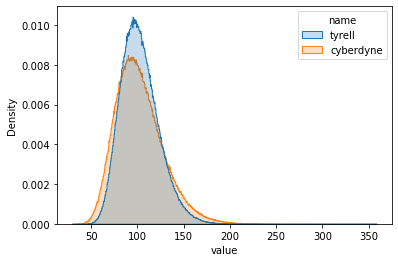

In [36]:
all_sims = pd.concat([sims_tyrell, sims_cyb], axis=1)
all_sims.columns.name = 'name'
sims_plot = all_sims.stack().to_frame().rename({0:'value'}, axis=1)
axes = sns.histplot(sims_plot, x="value", hue="name", element="step", stat="density")
axes.get_figure().savefig(os.path.expandvars("$DT4F_PROJECT/tmp/hist.pdf"))
axes